In [1]:
from satpy import Scene, find_files_and_readers
from datetime import datetime
from pyresample.geometry import AreaDefinition
import xarray as xr
import os
from glob import glob
import re
from dataset_selector import DatasetFilter
import numpy as np

In [2]:
open_water_flags = ['LAND', 'CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_MARGIN',
                    'INVALID', 'COSMETIC', 'SATURATED', 'SUSPECT', 
                    'HISOLZEN', 'HIGHGLINT', 'SNOW_ICE']

western_seas_se = AreaDefinition(area_id='western_seas_se', 
                                 description='western_seas_se', 
                                 proj_id='stere', 
                                 projection={'proj': 'stere', 'lat_0': 57.3016625, 'lon_0': 11.297785},
                                 width=1884,
                                 height=1992,
                                 area_extent=(-282586.412709, -290308.210120, 282586.412709, 307359.029789)
)

# scn = DatasetFilter.scene_creator_loop(open_water_flags=open_water_flags, base_dir='./data', area_definition=western_seas_se)

In [3]:
DatasetFilter(base_dir='./data', area_definition=western_seas_se)

Don't know how to open the following files: {'./data\\S3A_OL_2_WFR____20240305T092858_20240305T093158_20240305T112916_0180_109_364_1980_MAR_O_NR_003.SEN3\\instrument_data.nc', './data\\S3A_OL_2_WFR____20240305T092858_20240305T093158_20240305T112916_0180_109_364_1980_MAR_O_NR_003.SEN3\\time_coordinates.nc', './data\\S3A_OL_2_WFR____20240305T092858_20240305T093158_20240305T112916_0180_109_364_1980_MAR_O_NR_003.SEN3\\iop_lsd.nc', './data\\S3A_OL_2_WFR____20240305T092858_20240305T093158_20240305T112916_0180_109_364_1980_MAR_O_NR_003.SEN3\\tie_geo_coordinates.nc', './data\\S3A_OL_2_WFR____20240305T092858_20240305T093158_20240305T112916_0180_109_364_1980_MAR_O_NR_003.SEN3\\w_aer.nc', './data\\S3A_OL_2_WFR____20240305T092858_20240305T093158_20240305T112916_0180_109_364_1980_MAR_O_NR_003.SEN3\\tie_meteo.nc', './data\\S3A_OL_2_WFR____20240305T092858_20240305T093158_20240305T112916_0180_109_364_1980_MAR_O_NR_003.SEN3\\par.nc', './data\\S3A_OL_2_WFR____20240305T092858_20240305T093158_20240305T112

TypeError: DatasetFilter.calculate_overlap() takes 1 positional argument but 2 were given

In [ ]:
print(dataset)

In [ ]:
xr.set_options(display_max_rows=999, display_width=999)

In [3]:
reader = 'olci_l2'

files = find_files_and_readers(sensor='olci',
                               start_time=datetime(2024, 3, 5, 0, 0),
                               end_time=datetime(2024, 3, 5, 23, 59),
                               base_dir='./data',
                               reader=reader)

In [5]:
flag_list = ['LAND', 'CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_MARGIN', 
             'INVALID', 'COSMETIC', 'SATURATED', 'SUSPECT',
             'HISOLZEN', 'HIGHGLINT', 'SNOW_ICE', 'AC_FAIL',
             'WHITECAPS', 'ADJAC', 'RWNEG_O2', 'RWNEG_O3',
             'RWNEG_O4', 'RWNEG_O5', 'RWNEG_O6', 'RWNEG_O7', 'RWNEG_O8',
             'OCNN_FAIL']

open_water_flags = ['LAND', 'CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_MARGIN', 'INVALID', 'COSMETIC', 'SATURATED', 'SUSPECT', 'HISOLZEN', 'HIGHGLINT', 'SNOW_ICE']
land_flag = ['LAND']

c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


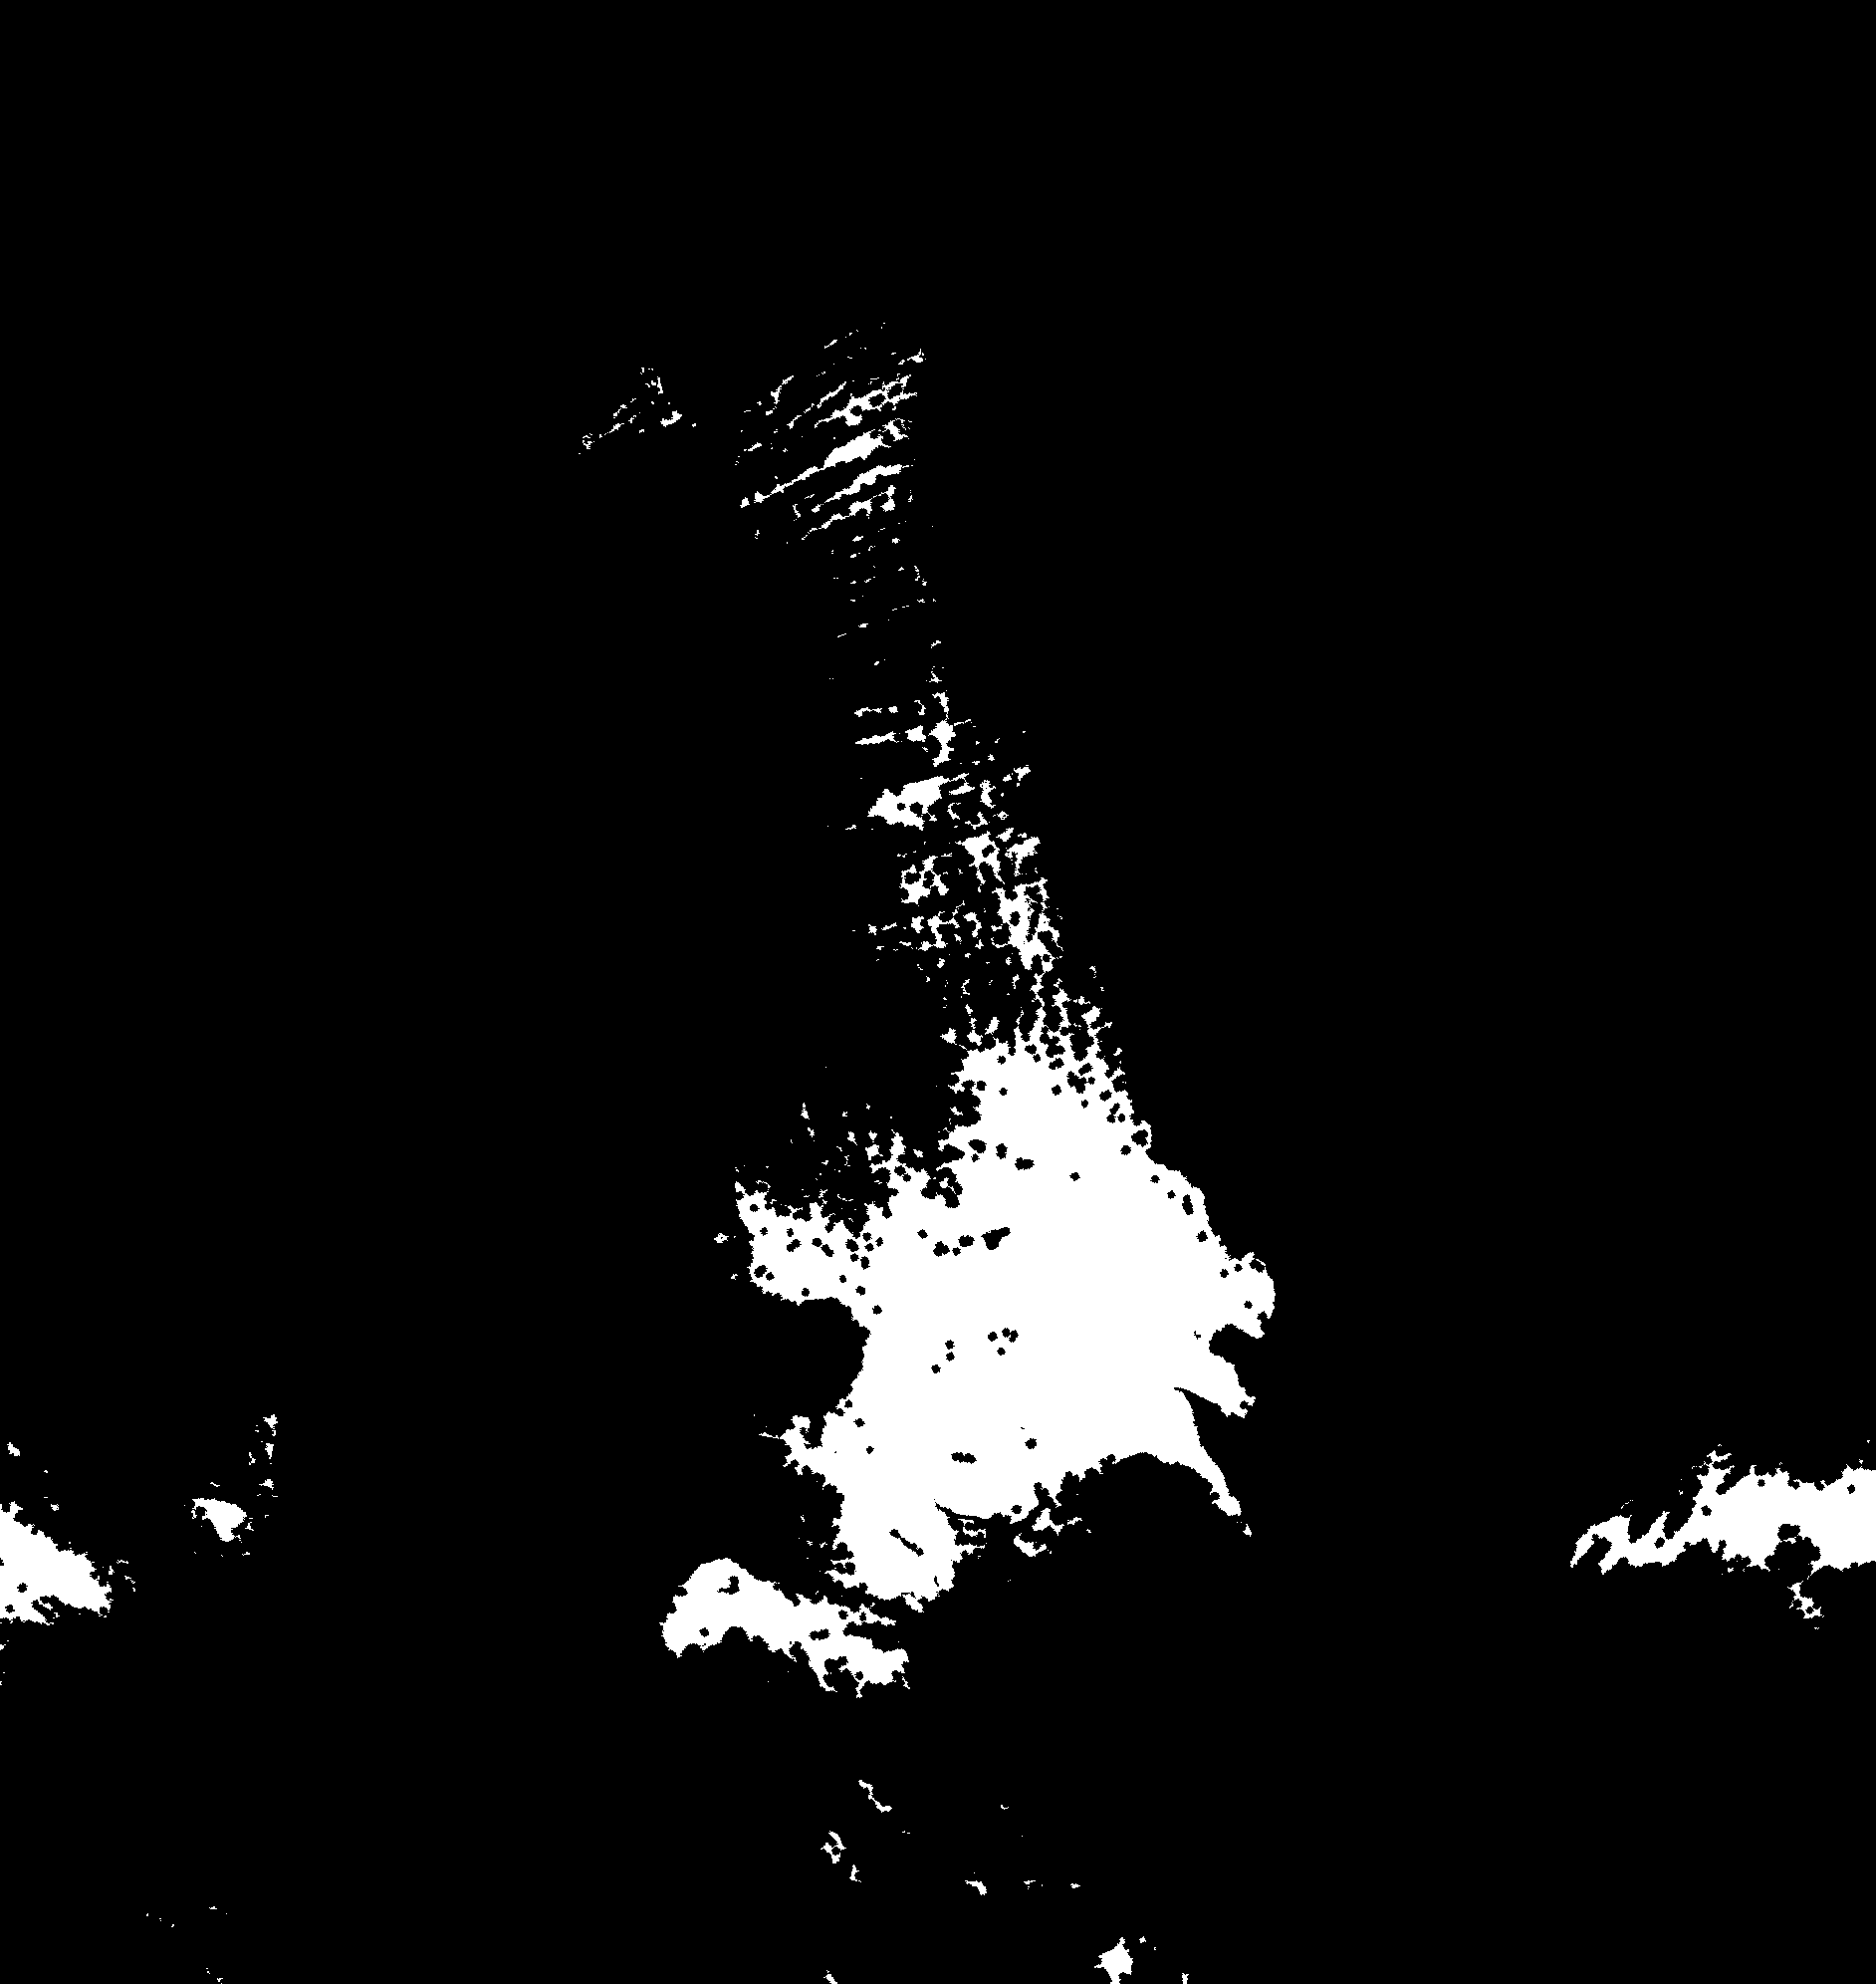

In [4]:
scn = Scene(filenames=files, reader='olci_l2', reader_kwargs=dict(mask_items=open_water_flags))
scn.load(['chl_nn', 'mask'])
new_scn = scn.resample(western_seas_se)
# new_scn['mask'] = new_scn['mask'].where()
new_scn['mask'].values = np.logical_not(new_scn['mask'].values)
# print(new_scn_invert)
new_scn.show('mask')

In [5]:
print(new_scn['mask'].values)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


In [ ]:
new_scn['valid_data'] = new_scn['chl_nn'].where(new_scn['mask'] == 1)
new_scn.show('valid_data')

In [5]:
valid_scn_area = new_scn['mask'].values.sum()
print(valid_scn_area)

218359


In [ ]:
a = 461465 / 1431062
print(a)

# Area Calculator

In [ ]:
land_mask = ['LAND']

In [ ]:
land_mask_scn = Scene(filenames=files, reader='olci_l2', reader_kwargs=dict(mask_items=land_mask))
land_mask_scn.load(['mask'])
resampled_land_mask_scn = land_mask_scn.resample(western_seas_se)
resampled_land_mask_scn.show('mask')

In [ ]:
# 2321866
land_coverage = resampled_land_mask_scn['mask'].values.sum()
print(land_coverage)
# 2572484

In [ ]:
minimum_invalid = land_coverage
invalid = new_scn['mask'].values.sum()

In [7]:
# land_coverage = resampled_land_mask_scn['mask'].values.sum()
land_coverage = 2321866
# AreaDefinition width * height
total_coverage = (1884 * 1992)
print(total_coverage)
water_coverage = total_coverage - land_coverage
print(water_coverage)
# 1431062

3752928
1431062


In [ ]:
scn_mask_area = total_coverage - new_scn['mask'].values.sum()
print(new_scn['mask'].values.sum())

In [ ]:
new_scn['mask'] = new_scn['mask'].where(resampled_land_mask_scn['mask'] == 0)
new_scn.show('mask')

In [8]:
print(valid_scn_area / water_coverage)

0.1525852828179352


In [ ]:
scn = Scene(filenames=glob('./data\\S3A_OL_2_WFR____20240305T092858_20240305T093158_20240305T112916_0180_109_364_1980_MAR_O_NR_003.SEN3\\*'), reader='olci_l2')
scn.load(['chl_nn'])
scn.show('chl_nn')

In [ ]:
print(glob("./data/*SEN3"))